<a href="https://colab.research.google.com/github/russellelliott/PythonChess/blob/main/Chess_Variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=JHN22fL4LVw

Here are the rules:
"Chess, but every move you make move you make must share the same letter or number with the previous move"

In [4]:
pip install CairoSVG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.4 MB/s 
     |████████████████████████████████| 69 kB 3.4 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=ede16e2a4b90e8ee3826829799984e3bbf9679dec0cc96c7f859d76e444f878b
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


Functions for movement and getting game status

In [5]:
import chess
import chess.svg
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#display the board as a png on matplotlib
def displayBoard(board):
    svg = chess.svg.board(board, size=350) #make the svg
    svg2png(bytestring=svg,write_to='output.png') #convert to png
    img = mpimg.imread('output.png')
    imgplot = plt.imshow(img)
    plt.show() #show the png

#function to check whose turn it is
def getTurn(board):
    #True = white, False = black
    if(board.turn):
        return("white")
    return("black")

#function to check the status of the game
def getStatus(board):
    status = "" #default status
    #Verifying check
    if(board.is_check()):
        status = "check"

    #Verifying checkmate
    if(board.is_checkmate()):
        status = "checkmate"

    #Verifying stalemate
    if(board.is_stalemate()):
        status = "stalemate"
    
    return status

#function that allows a human player to make a move
def human(board, moveInput):
    #displayBoard(board) #display the board after every turn
    #moveInput = input("make a legal move: ")
    if moveInput=="":
        print("need to input valid move")
        return board
    move = chess.Move.from_uci(moveInput) #make the move
    if move in board.legal_moves: #if the move is legal
        board.push(move) #push the move
    elif chess.Move.from_uci(moveInput + "q") in board.legal_moves: #check if promotion
        moveInput+='q' #autopromote to queen
        #moveInput += input("Which piece you want to promote the pawn to? [q,r,b,n]: ") #promotion query
        move = chess.Move.from_uci(moveInput) #make the move
        board.push(move) #push the move
    else:
        print("invalid move. try again")
    return board

#function to check whose turn it is
def getTurn(board):
    #True = white, False = black
    if(board.turn):
        return("white")
    return("black")

The rules are the same as chess except for this rule about movement:

After a player makes a move in which a PIECE ends on the ENDSQUARE, the move of the other player must satisfy at least one requirement:
- The piece must end on the same row the previous piece landed on
- The piece must end on the came column the previous piece landed on
- The piece must be of the same type as the previous piece


Get a piece in python chess
https://stackoverflow.com/questions/55650138/how-to-get-a-piece-in-python-chess

Get last n characters of string
https://thispointer.com/python-how-to-get-last-n-characters-in-a-string/

Convert object to string
https://www.educba.com/python-object-to-string/

Index of item in list
https://www.programiz.com/python-programming/methods/list/index

In [44]:
def getPieceAtSquare(endSquare):
    index = chess.SQUARE_NAMES.index(endSquare)
    piece = board.piece_at(index) #piece at that square
    return str(piece)

#check if the move is valid
#prevSpace = the square the previous move landed on
#nextSquare = the square the next move will go to
#prevPiece = the piece moved on the previous turn
#nextPiece = the piece that will be moved on the next turn

def isValid(prevSpace, nextSpace, prevPiece, nextPiece):
    print(prevSpace, nextSpace)
    #[0-1] is the starting cell
    #[2-3] is the ending cell
    #the column/row of the start cell must match that of the end cell
    #check if the rows and cols match
    prevLetter = prevSpace[2] #letter the prev piece ends on
    nextLetter = nextSpace[2] #letter the next piece ends on
    print(prevLetter, nextLetter)
    prevNumber = prevSpace[3] #number the prev piece ends on
    nextNumber = nextSpace[3] #number the next piece ends on
    print(prevNumber, nextNumber)

    #print(prevPiece, nextPiece)

    spaceMatch = ( (prevLetter == nextLetter) or (prevNumber == nextNumber) ) #same letter or same number

    pieceMatch = (prevPiece.lower() == nextPiece.lower()) #same type; must be case insensitive
    return(spaceMatch or pieceMatch)

def getMoveOptions(board):
    moveOptions = board.legal_moves #initally, set the move options to all of them
    #first, get the most recent move (if applicable)
    try:
        prevMove = str(board.peek()) #get the previous move. convert to string, as board.peek() returns a move object
        print("previous move: ", prevMove)
        #moveOptions = prevMove
    except:
        print("no previous") #no previous moves; player can make any move
        return None #return None if there is no previous move
    
    #logic to determine the move options
    #we got the previous move. now we need the piece on that space.
    #print(prevMove)
    endSquare = prevMove[-2:] #prevMove is the most recent move. [-2:] returns the last 2 characters, which is the square it resides on
    #print(endSquare)
    #square names
    '''print(chess.SQUARE_NAMES)
    index = chess.SQUARE_NAMES.index(endSquare)
    piece = board.piece_at(index) #piece at that square
    print(piece)'''

    piece = getPieceAtSquare(endSquare) #get the piece that was recently moved
    #print(piece)

    #list to store the valid moves
    validMoves = []
    #iterate through all the moves
    for move in moveOptions:
        #print(move) #move in the list of options
        stringMove = str(move) #convert to string for easy reading
        startSquare = stringMove[0:2] #get the starting square for the current move
        #print(startSquare)
        movePiece = getPieceAtSquare(startSquare) #get the piece at the starting square of the move
        if isValid(str(prevMove), str(move), piece, movePiece):
            validMoves.append(move) #push valid move onto the move list
            #print("valid move")
    
    #print(validMoves) #the resulting lists are of type "move.from_uci"

        
    return validMoves
    

Main Code

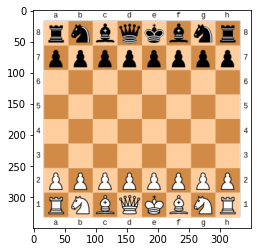

no previous
move options:  None
make a move: a2a4


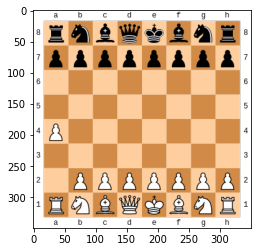

previous move:  a2a4
a2a4 g8h6
a h
4 6
a2a4 g8f6
a f
4 6
a2a4 b8c6
a c
4 6
a2a4 b8a6
a a
4 6
a2a4 h7h6
a h
4 6
a2a4 g7g6
a g
4 6
a2a4 f7f6
a f
4 6
a2a4 e7e6
a e
4 6
a2a4 d7d6
a d
4 6
a2a4 c7c6
a c
4 6
a2a4 b7b6
a b
4 6
a2a4 a7a6
a a
4 6
a2a4 h7h5
a h
4 5
a2a4 g7g5
a g
4 5
a2a4 f7f5
a f
4 5
a2a4 e7e5
a e
4 5
a2a4 d7d5
a d
4 5
a2a4 c7c5
a c
4 5
a2a4 b7b5
a b
4 5
a2a4 a7a5
a a
4 5
move options:  [Move.from_uci('b8a6'), Move.from_uci('h7h6'), Move.from_uci('g7g6'), Move.from_uci('f7f6'), Move.from_uci('e7e6'), Move.from_uci('d7d6'), Move.from_uci('c7c6'), Move.from_uci('b7b6'), Move.from_uci('a7a6'), Move.from_uci('h7h5'), Move.from_uci('g7g5'), Move.from_uci('f7f5'), Move.from_uci('e7e5'), Move.from_uci('d7d5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a5')]
make a move: b8a6


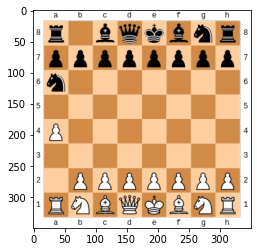

previous move:  b8a6
b8a6 g1h3
a h
6 3
b8a6 g1f3
a f
6 3
b8a6 b1c3
a c
6 3
b8a6 b1a3
a a
6 3
b8a6 a1a3
a a
6 3
b8a6 a1a2
a a
6 2
b8a6 a4a5
a a
6 5
b8a6 h2h3
a h
6 3
b8a6 g2g3
a g
6 3
b8a6 f2f3
a f
6 3
b8a6 e2e3
a e
6 3
b8a6 d2d3
a d
6 3
b8a6 c2c3
a c
6 3
b8a6 b2b3
a b
6 3
b8a6 h2h4
a h
6 4
b8a6 g2g4
a g
6 4
b8a6 f2f4
a f
6 4
b8a6 e2e4
a e
6 4
b8a6 d2d4
a d
6 4
b8a6 c2c4
a c
6 4
b8a6 b2b4
a b
6 4
move options:  [Move.from_uci('g1h3'), Move.from_uci('g1f3'), Move.from_uci('b1c3'), Move.from_uci('b1a3'), Move.from_uci('a1a3'), Move.from_uci('a1a2'), Move.from_uci('a4a5')]
make a move: b2c4
invalid move. try again


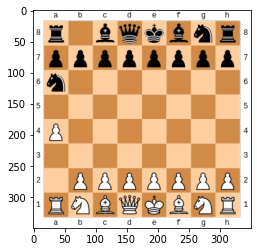

previous move:  b8a6
b8a6 g1h3
a h
6 3
b8a6 g1f3
a f
6 3
b8a6 b1c3
a c
6 3
b8a6 b1a3
a a
6 3
b8a6 a1a3
a a
6 3
b8a6 a1a2
a a
6 2
b8a6 a4a5
a a
6 5
b8a6 h2h3
a h
6 3
b8a6 g2g3
a g
6 3
b8a6 f2f3
a f
6 3
b8a6 e2e3
a e
6 3
b8a6 d2d3
a d
6 3
b8a6 c2c3
a c
6 3
b8a6 b2b3
a b
6 3
b8a6 h2h4
a h
6 4
b8a6 g2g4
a g
6 4
b8a6 f2f4
a f
6 4
b8a6 e2e4
a e
6 4
b8a6 d2d4
a d
6 4
b8a6 c2c4
a c
6 4
b8a6 b2b4
a b
6 4
move options:  [Move.from_uci('g1h3'), Move.from_uci('g1f3'), Move.from_uci('b1c3'), Move.from_uci('b1a3'), Move.from_uci('a1a3'), Move.from_uci('a1a2'), Move.from_uci('a4a5')]
make a move: b1c3


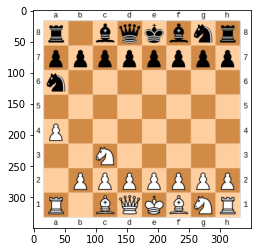

previous move:  b1c3
b1c3 g8h6
c h
3 6
b1c3 g8f6
c f
3 6
b1c3 a8b8
c b
3 8
b1c3 a6b8
c b
3 8
b1c3 a6c5
c c
3 5
b1c3 a6b4
c b
3 4
b1c3 h7h6
c h
3 6
b1c3 g7g6
c g
3 6
b1c3 f7f6
c f
3 6
b1c3 e7e6
c e
3 6
b1c3 d7d6
c d
3 6
b1c3 c7c6
c c
3 6
b1c3 b7b6
c b
3 6
b1c3 h7h5
c h
3 5
b1c3 g7g5
c g
3 5
b1c3 f7f5
c f
3 5
b1c3 e7e5
c e
3 5
b1c3 d7d5
c d
3 5
b1c3 c7c5
c c
3 5
b1c3 b7b5
c b
3 5
move options:  [Move.from_uci('g8h6'), Move.from_uci('g8f6'), Move.from_uci('a6b8'), Move.from_uci('a6c5'), Move.from_uci('a6b4'), Move.from_uci('c7c6'), Move.from_uci('c7c5')]
make a move: c7c5


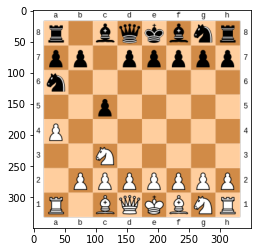

previous move:  c7c5
c7c5 c3d5
c d
5 5
c7c5 c3b5
c b
5 5
c7c5 c3e4
c e
5 4
c7c5 c3a2
c a
5 2
c7c5 c3b1
c b
5 1
c7c5 g1h3
c h
5 3
c7c5 g1f3
c f
5 3
c7c5 a1a3
c a
5 3
c7c5 a1a2
c a
5 2
c7c5 a1b1
c b
5 1
c7c5 a4a5
c a
5 5
c7c5 h2h3
c h
5 3
c7c5 g2g3
c g
5 3
c7c5 f2f3
c f
5 3
c7c5 e2e3
c e
5 3
c7c5 d2d3
c d
5 3
c7c5 b2b3
c b
5 3
c7c5 h2h4
c h
5 4
c7c5 g2g4
c g
5 4
c7c5 f2f4
c f
5 4
c7c5 e2e4
c e
5 4
c7c5 d2d4
c d
5 4
c7c5 b2b4
c b
5 4
move options:  [Move.from_uci('c3d5'), Move.from_uci('c3b5'), Move.from_uci('a4a5'), Move.from_uci('h2h3'), Move.from_uci('g2g3'), Move.from_uci('f2f3'), Move.from_uci('e2e3'), Move.from_uci('d2d3'), Move.from_uci('b2b3'), Move.from_uci('h2h4'), Move.from_uci('g2g4'), Move.from_uci('f2f4'), Move.from_uci('e2e4'), Move.from_uci('d2d4'), Move.from_uci('b2b4')]


KeyboardInterrupt: ignored

In [46]:
board = chess.Board()
#print(board.unicode())
while getStatus(board) not in ['checkmate', 'stalemate']:
    displayBoard(board)
    moveOptions = getMoveOptions(board)
    print("move options: ", moveOptions)

    move = input("make a move: ")
    makeMove = chess.Move.from_uci(move) #make the move
    #moveOptions is initally set to none for the first move, as all legal moves are valid
    #after that, moveOptions is a list of type "move.from_uci"
    if makeMove != None or makeMove in moveOptions:
        human(board, move)
    else:
        print("invalid move")

    '''displayBoard(board)
    moveOptions = getMoveOptions(board)
    print("move options: ", moveOptions)
    move = input("make a move: ")
    human(board, move)'''